# Step 1: Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
# For visual represantation create a function so that it will use directly

def plot_history(history, title):
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_confusion(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n({cm_norm[i,j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black", fontsize=8)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Step 2: Load the Dataset

In [3]:
# Load Fashion-MNIST dataset
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

# Check shapes
print("Training data shape:", training_images.shape, training_labels.shape)
print("Testing data shape:", testing_images.shape, testing_labels.shape)





29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


# Step 3: Data Preprocessing

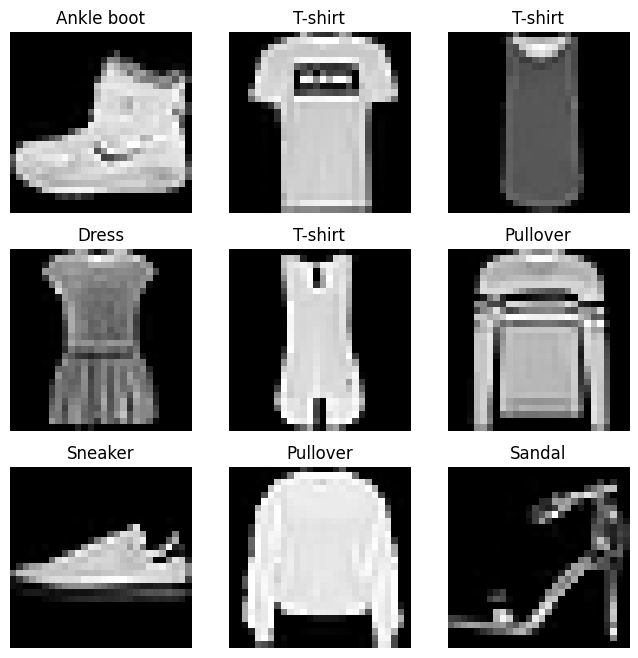

In [4]:
#visual represantation of the training data

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_images[i], cmap='gray')
    plt.title(labels[training_labels[i]])
    plt.axis('off')
plt.show()

Normalize the Data


In [5]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

training_images = training_images.reshape(-1, 28*28)
testing_images = testing_images.reshape(-1, 28*28)

one hot encodeing

In [6]:
training_labels = to_categorical(training_labels, 10)
testing_labels = to_categorical(testing_labels, 10)

**Build the Models**

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Compile and Train the Model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(training_images, training_labels, epochs=20, batch_size=64,
                    validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7523 - loss: 0.7049 - val_accuracy: 0.8547 - val_loss: 0.4129
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3953 - val_accuracy: 0.8688 - val_loss: 0.3676
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8748 - loss: 0.3479 - val_accuracy: 0.8482 - val_loss: 0.4185
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8808 - loss: 0.3211 - val_accuracy: 0.8744 - val_loss: 0.3407
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8890 - loss: 0.3015 - val_accuracy: 0.8776 - val_loss: 0.3323
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8940 - loss: 0.2828 - val_accuracy: 0.8813 - val_loss: 0.3308
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8986 - loss: 0.2729 - val_accuracy: 0.8860 - val_loss: 0.3294
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9036 - loss: 0.2624 - val_accuracy: 0.

# Step 6: Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(testing_images, testing_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8845 - loss: 0.3603
Test accuracy: 0.8822000026702881


# Step 7: Additional Experiments

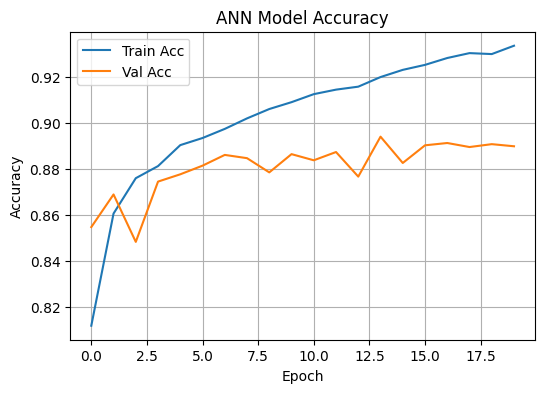

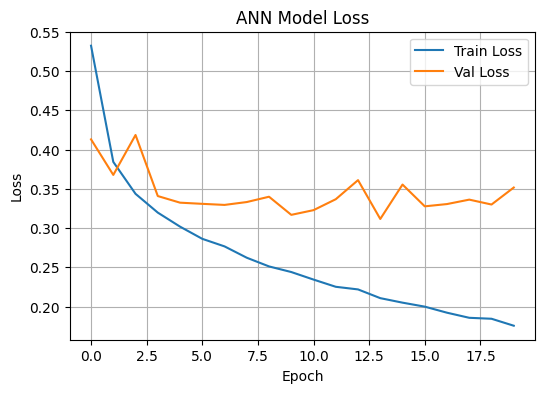

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


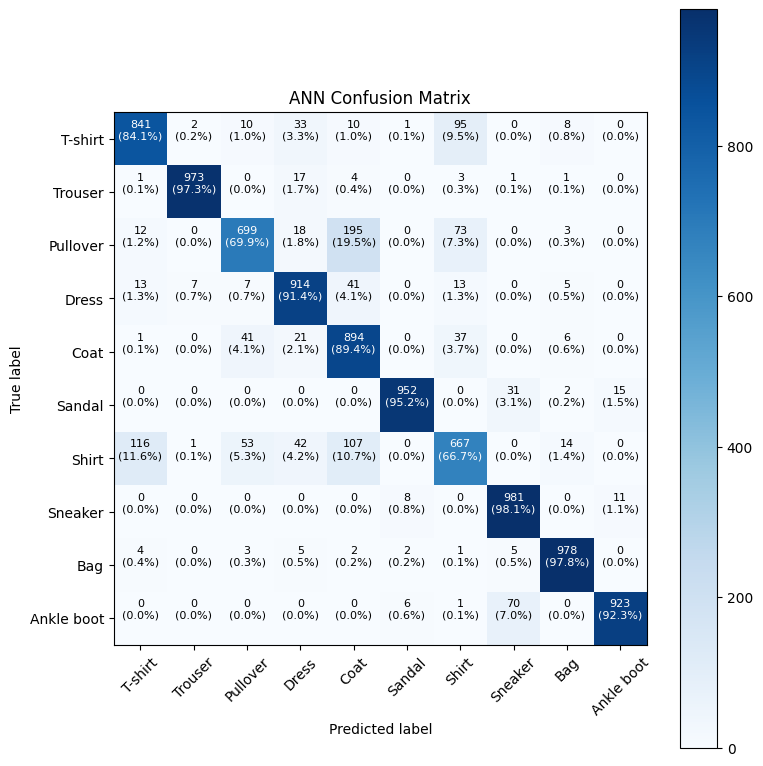

In [11]:
plot_history(history, title="ANN Model")

y_pred = model.predict(testing_images)
y_pred = np.argmax(y_pred, axis=1)

if len(testing_labels.shape) > 1:
    testing_labels = np.argmax(testing_labels, axis=1)

cm = confusion_matrix(testing_labels, y_pred)
plot_confusion(cm, classes=labels, title="ANN Confusion Matrix")

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the data for CNN
training_images_cnn = training_images.reshape(-1, 28, 28, 1)
testing_images_cnn = testing_images.reshape(-1, 28, 28, 1)

# CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the CNN model (same number of epochs and batch size as ANN)
history_cnn = cnn_model.fit(
    training_images_cnn,
    training_labels,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
750/750 - 9s - 12ms/step - accuracy: 0.7764 - loss: 0.6009 - val_accuracy: 0.8597 - val_loss: 0.3937
Epoch 2/20
750/750 - 3s - 3ms/step - accuracy: 0.8684 - loss: 0.3663 - val_accuracy: 0.8851 - val_loss: 0.3188
Epoch 3/20
750/750 - 3s - 3ms/step - accuracy: 0.8877 - loss: 0.3122 - val_accuracy: 0.8946 - val_loss: 0.2862
Epoch 4/20
750/750 - 3s - 3ms/step - accuracy: 0.8993 - loss: 0.2774 - val_accuracy: 0.8951 - val_loss: 0.2866
Epoch 5/20
750/750 - 3s - 4ms/step - accuracy: 0.9074 - loss: 0.2509 - val_accuracy: 0.9007 - val_loss: 0.2675
Epoch 6/20
750/750 - 5s - 6ms/step - accuracy: 0.9132 - loss: 0.2324 - val_accuracy: 0.8970 - val_loss: 0.2728
Epoch 7/20
750/750 - 3s - 3ms/step - accuracy: 0.9218 - loss: 0.2112 - val_accuracy: 0.9078 - val_loss: 0.2506
Epoch 8/20
750/750 - 3s - 4ms/step - accuracy: 0.9282 - loss: 0.1952 - val_accuracy: 0.9128 - val_loss: 0.2475
Epoch 9/20
750/750 - 4s - 5ms/step - accuracy: 0.9336 - loss: 0.1788 - val_accuracy: 0.9138 - val_loss: 0.2394


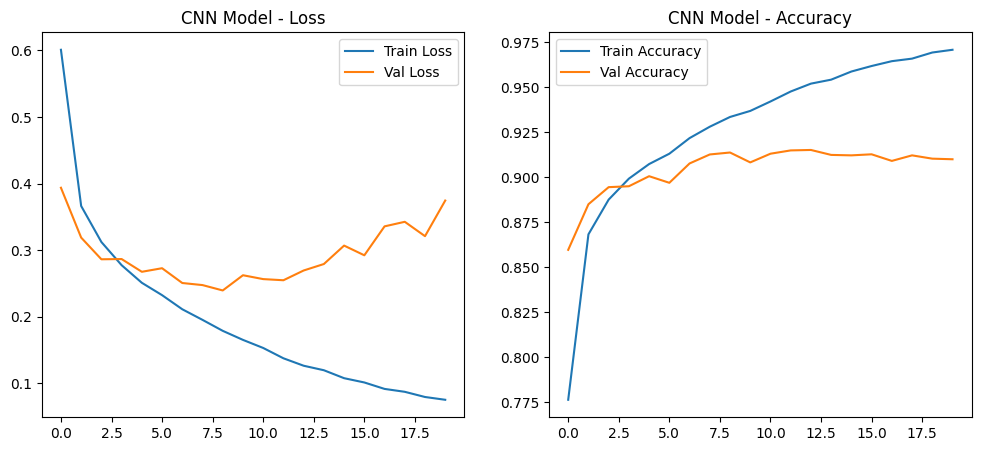

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot training vs validation loss
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('CNN Model - Loss')

# Plot training vs validation accuracy
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('CNN Model - Accuracy')

plt.show()

In [16]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(testing_images_cnn, testing_labels)
print("CNN Test Accuracy:",test_acc_cnn * 100)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)